In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [259]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [260]:
#raw_data = pd.read_csv('/content/drive/MyDrive/Google Colab Notebooks/Mini Sem 8/dataset/large sample/IBM_2years_15Min (1).csv')
#raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/RELIANCE.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFC.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/TCS.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFCBANK.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/LT.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/INFY.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/KOTAKBANK.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ITC.csv')
raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/SBIN.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ICICIBANK.csv')

In [261]:
print(raw_data.shape)
raw_data.head()

(6404, 7)


,Datetime,Open,High,Low,Close,Volume,Trading_code
0,2021-04-26 09:15:00+05:30,339.25,346.35,339.25,345.35,7715118,SBIN
1,2021-04-26 09:30:00+05:30,345.50,346.50,345.00,345.05,3010818,SBIN
2,2021-04-26 09:45:00+05:30,345.10,346.25,345.00,345.90,2390991,SBIN
3,2021-04-26 10:00:00+05:30,345.85,346.35,344.25,344.50,2074132,SBIN
4,2021-04-26 10:15:00+05:30,344.45,345.20,344.05,345.10,1476206,SBIN


In [262]:
# rename columns according to our older convention
raw_data.rename(
    {'Datetime':'time',
     'Open': 'open',
    'High': 'high',
    'Low' : 'low',
    'Close':'close',
    'Volume' : 'volume'},
    axis=1,
    inplace=True)

In [263]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

In [264]:
# reversing the dataframe 
close_ds_rev = close_ds.loc[::-1, :]
close_ds_rev.head()

,time,close
6403,2022-05-06 15:15:00+05:30,486.00
6402,2022-05-06 15:00:00+05:30,484.00
6401,2022-05-06 14:45:00+05:30,481.75
6400,2022-05-06 14:30:00+05:30,481.05
6399,2022-05-06 14:15:00+05:30,481.00


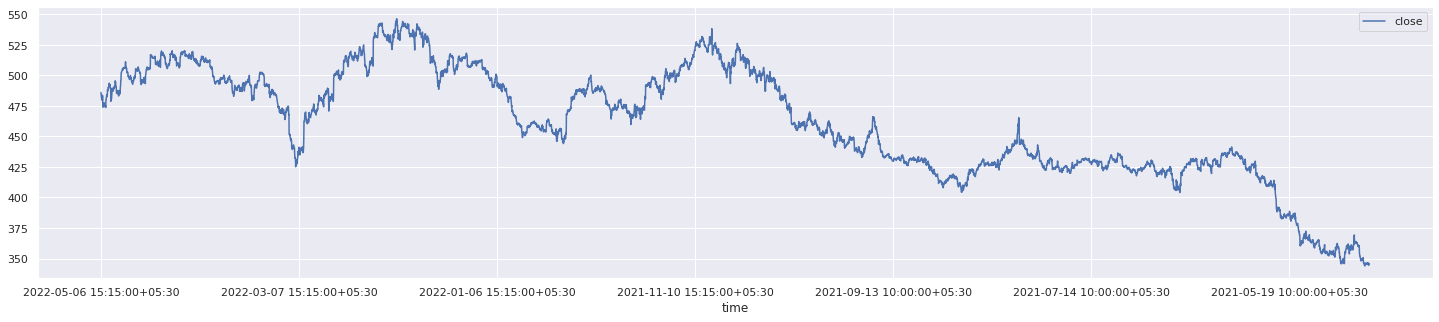

In [265]:
close_ds_rev.plot(x='time', y='close', figsize=(25, 5))

In [266]:
# converting time serires into a supervised learning problem
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [267]:
# n_in ---> number of previous data points (lag observations) to consider as input
# n_out --> number of datapoints to predict
# dataset ----> dataframe with (n_in + n_out + 1 [for current timestamp]) numbers of columns used for supervised training of the model 

n_in = 50
n_out = 1
dataset = series_to_supervised(close_ds_rev.drop('time', axis=1), n_in, n_out)
print(dataset.shape)
dataset.head()

(6353, 52)


,close(t-50),close(t-49),close(t-48),close(t-47),close(t-46),close(t-45),close(t-44),close(t-43),close(t-42),close(t-41),...,close(t-8),close(t-7),close(t-6),close(t-5),close(t-4),close(t-3),close(t-2),close(t-1),close(t),close(t+1)
6353,486.00,484.00,481.75,481.05,481.00,483.95,481.70,479.40,483.45,474.05,...,493.65,492.15,491.75,492.50,492.00,489.50,489.20,489.75,478.80,480.90
6352,484.00,481.75,481.05,481.00,483.95,481.70,479.40,483.45,474.05,474.30,...,492.15,491.75,492.50,492.00,489.50,489.20,489.75,478.80,480.90,480.35
6351,481.75,481.05,481.00,483.95,481.70,479.40,483.45,474.05,474.30,474.25,...,491.75,492.50,492.00,489.50,489.20,489.75,478.80,480.90,480.35,480.65
6350,481.05,481.00,483.95,481.70,479.40,483.45,474.05,474.30,474.25,474.30,...,492.50,492.00,489.50,489.20,489.75,478.80,480.90,480.35,480.65,482.65
6349,481.00,483.95,481.70,479.40,483.45,474.05,474.30,474.25,474.30,477.30,...,492.00,489.50,489.20,489.75,478.80,480.90,480.35,480.65,482.65,486.30


In [268]:
# train test split

from sklearn.model_selection import train_test_split
target = dataset.loc[:, ['close(t+1)']]
features = dataset.drop('close(t+1)', axis=1)
print(target.shape)
print(features.shape)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6353, 1)
(6353, 51)
(4447, 51)
(4447, 1)
(1906, 51)
(1906, 1)


In [269]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_test_series.shape)

Train set shape (4447, 51, 1)
Validation set shape (1906, 51, 1)


In [270]:
# Model training

from tensorflow import keras 
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

# Multilayer perceptron 

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003))
model_lstm.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 50)                10400     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [271]:
lstm_history = model_lstm.fit(X_train_series, y_train.values, validation_data=(X_test_series, y_test.values), epochs=60, verbose=2)

Epoch 1/60
139/139 - 8s - loss: 302943520.0000 - val_loss: 4417612.0000 - 8s/epoch - 59ms/step
Epoch 2/60
139/139 - 4s - loss: 57292976.0000 - val_loss: 102909992.0000 - 4s/epoch - 26ms/step
Epoch 3/60
139/139 - 3s - loss: 88975584.0000 - val_loss: 75866816.0000 - 3s/epoch - 21ms/step
Epoch 4/60
139/139 - 3s - loss: 62607092.0000 - val_loss: 50595948.0000 - 3s/epoch - 21ms/step
Epoch 5/60
139/139 - 3s - loss: 39831908.0000 - val_loss: 30382278.0000 - 3s/epoch - 21ms/step
Epoch 6/60
139/139 - 3s - loss: 22706506.0000 - val_loss: 16217704.0000 - 3s/epoch - 21ms/step
Epoch 7/60
139/139 - 3s - loss: 11449807.0000 - val_loss: 7606003.0000 - 3s/epoch - 21ms/step
Epoch 8/60
139/139 - 3s - loss: 5070230.5000 - val_loss: 3110451.2500 - 3s/epoch - 21ms/step
Epoch 9/60
139/139 - 3s - loss: 1968286.2500 - val_loss: 1108887.5000 - 3s/epoch - 21ms/step
Epoch 10/60
139/139 - 3s - loss: 694750.6250 - val_loss: 369938.7812 - 3s/epoch - 21ms/step
Epoch 11/60
139/139 - 3s - loss: 265924.7812 - val_loss: 

Text(0, 0.5, 'MSE')

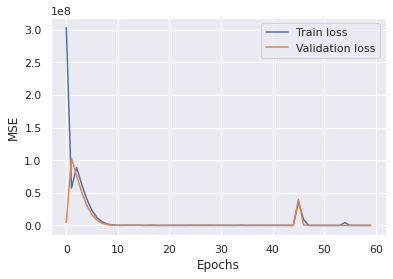

In [272]:
# plots 
fig = plt.figure()
plt.plot(lstm_history.history['loss'], label='Train loss')
plt.plot(lstm_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [273]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
lstm_train_pred = model_lstm.predict(X_train.values)
lstm_test_pred = model_lstm.predict(X_test.values)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Test rmse:', np.sqrt(mean_squared_error(y_test, lstm_test_pred)))

Train rmse: 142.6967088920585
Test rmse: 106.69057460442379


In [274]:
from sklearn.metrics import mean_absolute_error
print('Train MAE:', mean_absolute_error(y_train, lstm_train_pred))
print('Test MAE:', mean_absolute_error(y_test, lstm_test_pred))

Train MAE: 19.953481153244113
Test MAE: 17.613144497306


In [275]:
# MAPE calculation
from sklearn.metrics import mean_absolute_percentage_error
print('Train MAPE:', mean_absolute_percentage_error(y_train, lstm_train_pred))
print('Test MAPE:', mean_absolute_percentage_error(y_test, lstm_test_pred))

Train MAPE: 0.04269799867882884
Test MAPE: 0.03800381863160279
